<a href="https://colab.research.google.com/github/toqa-ehab/Heart_Disease_Project/blob/main/notebooks/06_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Configure Git
!git config --global user.name "toqa-ehab"
!git config --global user.email "toqaehab19@gmail.com"

# 2. Clone your GitHub repository
!git clone https://github.com/toqa-ehab/Heart_Disease_Project.git

# 3. Navigate into the project folder
%cd Heart_Disease_Project

# 4. Create the required folders (data, notebooks, models, results)
!mkdir -p data notebooks models results

# 5. Check the folder structure was created
!ls

Cloning into 'Heart_Disease_Project'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
Receiving objects: 100% (47/47), 635.28 KiB | 6.83 MiB/s, done.
remote: Total 47 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Resolving deltas: 100% (21/21), done.
/content/Heart_Disease_Project
data  heart_disease.csv  LICENSE  models  notebooks  README.md	results


In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [5]:
import pandas as pd
import io

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
# This line uses the 'uploaded' variable from the previous cell
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']), header=None, names=column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Save the dataframe to the 'data/' folder for permanent storage
df.to_csv('data/heart.csv', index=False)
# Verify the file is in the right place
print("File saved in:")
!ls data/

File saved in:
heart.csv  heart_disease.csv


In [7]:
print("Missing values (as '?'):")
print(df.isin(['?']).sum())

import numpy as np
df.replace('?', np.nan, inplace=True)

df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

print("\nMissing values (NaN):")
print(df.isnull().sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

print("\nMissing values after imputation:")
print(df.isnull().sum().sum())

Missing values (as '?'):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values (NaN):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Missing values after imputation:
0


In [8]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# Performing one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nDataFrame shape after one-hot encoding:", df.shape)

Unique values in categorical columns:
cp: [1. 4. 3. 2.]
restecg: [2. 0. 1.]
slope: [3. 2. 1.]
thal: [6. 3. 7.]

DataFrame shape after one-hot encoding: (303, 19)


In [9]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Apply scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical features standardized.")

Numerical features standardized.


In [10]:
# ------------------------------------------------------------------
# DATA INTEGRITY CHECKS
# ------------------------------------------------------------------

print("="*55)
print("1. DATASET SHAPE")
print("="*55)
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\n")

print("="*55)
print("2. CHECK FOR DUPLICATE ROWS")
print("="*55)
num_duplicates = df.duplicated().sum()
print(f"Number of completely duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {num_duplicates} duplicate row(s).")
    print(f"New dataset shape: {df.shape}")
else:
    print("No duplicate rows found. Dataset is clean!")
print("\n")

print("="*55)
print("3. CHECK FOR MISSING VALUES")
print("="*55)
print(df.isnull().sum())
print("\n")

1. DATASET SHAPE
Number of Rows: 303
Number of Columns: 19


2. CHECK FOR DUPLICATE ROWS
Number of completely duplicate rows: 0
No duplicate rows found. Dataset is clean!


3. CHECK FOR MISSING VALUES
age            0
sex            0
trestbps       0
chol           0
fbs            0
thalach        0
exang          0
oldpeak        0
ca             0
target         0
cp_2.0         0
cp_3.0         0
cp_4.0         0
restecg_1.0    0
restecg_2.0    0
slope_2.0      0
slope_3.0      0
thal_6.0       0
thal_7.0       0
dtype: int64




In [11]:
# ------------------------------------------------------------------
# DATA OVERVIEW
# ------------------------------------------------------------------

print("="*55)
print("4. FIRST 5 ROWS")
print("="*55)
print(df.head())
print("\n")

print("="*55)
print("5. DATASET INFORMATION")
print("="*55)
df.info()
print("\n")

print("="*55)
print("6. SUMMARY STATISTICS")
print("="*55)
print(df.describe())
print("\n")

print("="*55)
print("7. CHECK UNIQUE VALUES IN TARGET COLUMN")
print("="*55)
print(df['target'].value_counts())

4. FIRST 5 ROWS
        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak   ca  \
0  0.948726  1.0  0.757525 -0.264900  1.0  0.017197    0.0  1.087338  0.0   
1  1.392002  1.0  1.611220  0.760415  0.0 -1.821905    1.0  0.397182  3.0   
2  1.392002  1.0 -0.665300 -0.342283  0.0 -0.902354    1.0  1.346147  2.0   
3 -1.932564  1.0 -0.096170  0.063974  0.0  1.637359    0.0  2.122573  0.0   
4 -1.489288  0.0 -0.096170 -0.825922  0.0  0.980537    0.0  0.310912  0.0   

   target  cp_2.0  cp_3.0  cp_4.0  restecg_1.0  restecg_2.0  slope_2.0  \
0       0   False   False   False        False         True      False   
1       2   False   False    True        False         True       True   
2       1   False   False    True        False         True       True   
3       0   False    True   False        False        False      False   
4       0    True   False   False        False         True      False   

   slope_3.0  thal_6.0  thal_7.0  
0       True      True     False  
1     

In [12]:
# ADJUST TARGET VARIABLE FOR BINARY CLASSIFICATION
# This ensures all values > 0 are set to 1. In this specific dataset, the target was already binary, so no changes were made.

# Convert all values > 0 to 1
df['target'] = (df['target'] > 0).astype(int)

print("Unique values in target AFTER adjustment:")
print(df['target'].value_counts())

Unique values in target AFTER adjustment:
target
0    164
1    139
Name: count, dtype: int64


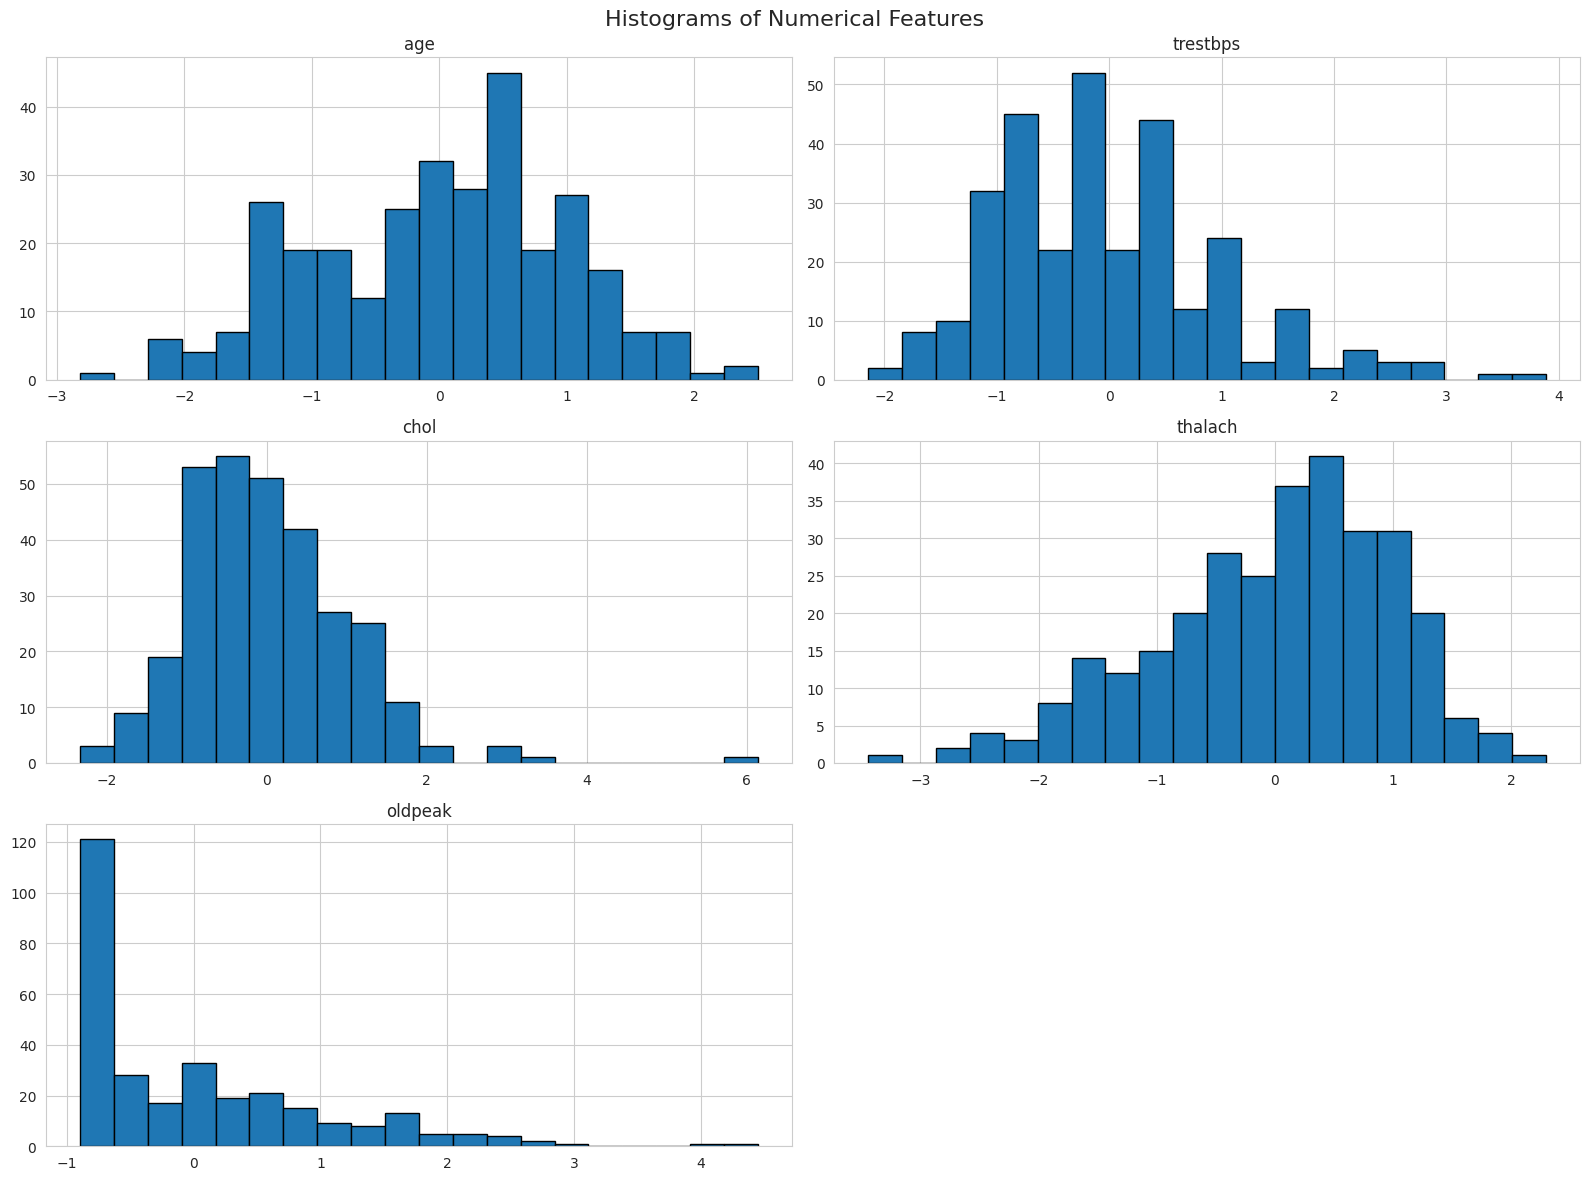

In [13]:
# 1. Histograms for NUMERICAL features only
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

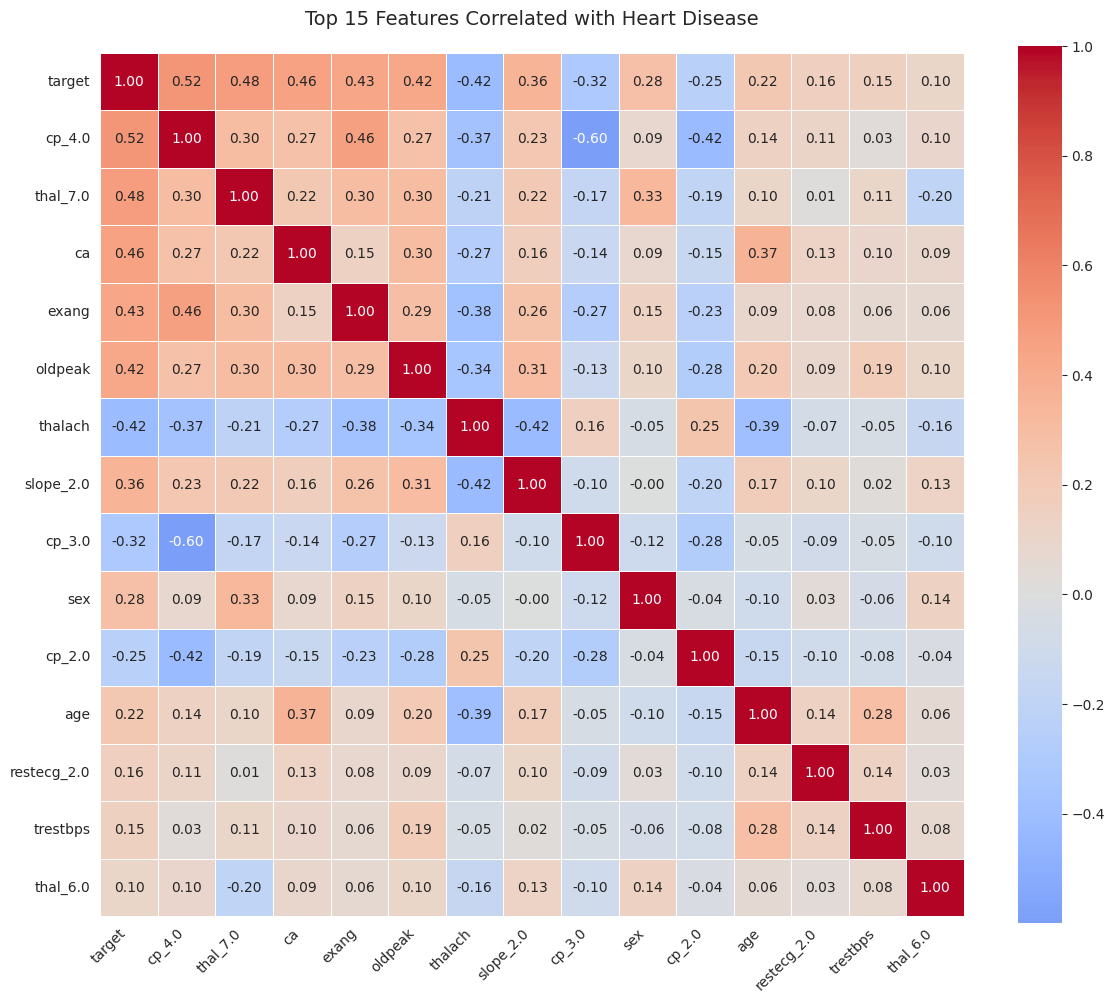

In [14]:
# 2. FOCUSED Correlation Heatmap
plt.figure(figsize=(12, 10))

# Calculate correlation with the target and get top 15 features
corr_matrix = df.corr()
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
top_features = target_corr.head(15).index.tolist()
small_corr_matrix = corr_matrix.loc[top_features, top_features]

# Plot the heatmap
sns.heatmap(small_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, square=True)
plt.title('Top 15 Features Correlated with Heart Disease', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

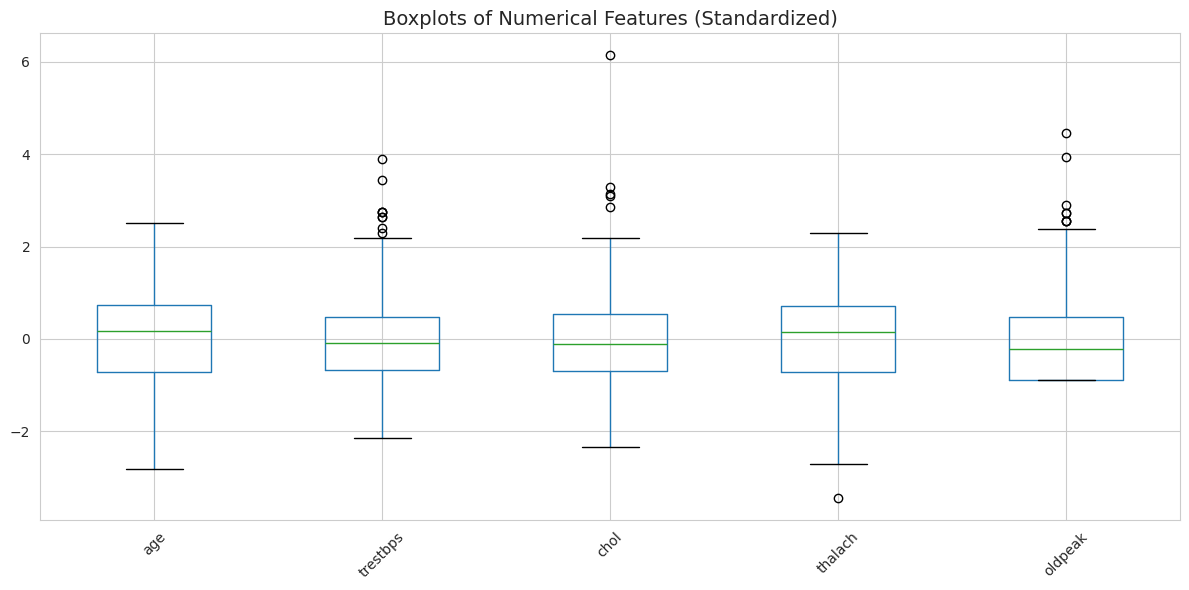

In [15]:
# 3. Boxplots for Numerical Features
plt.figure(figsize=(12, 6))
df[numerical_features].boxplot()
plt.title('Boxplots of Numerical Features (Standardized)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# ------------------------------------------------------------------
# Apply PCA and Determine Optimal Number of Components
# ------------------------------------------------------------------

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize PCA and fit to data
pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components needed to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to retain 95% variance: {n_components_95}")

Number of components needed to retain 95% variance: 12


In [17]:
# ------------------------------------------------------------------
# Create PCA-transformed dataset with optimal components
# ------------------------------------------------------------------

pca_optimal = PCA(n_components=12)  # Use the number you found (12)
X_pca = pca_optimal.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"PCA-transformed shape: {X_pca.shape}")

Original shape: (303, 18)
PCA-transformed shape: (303, 12)


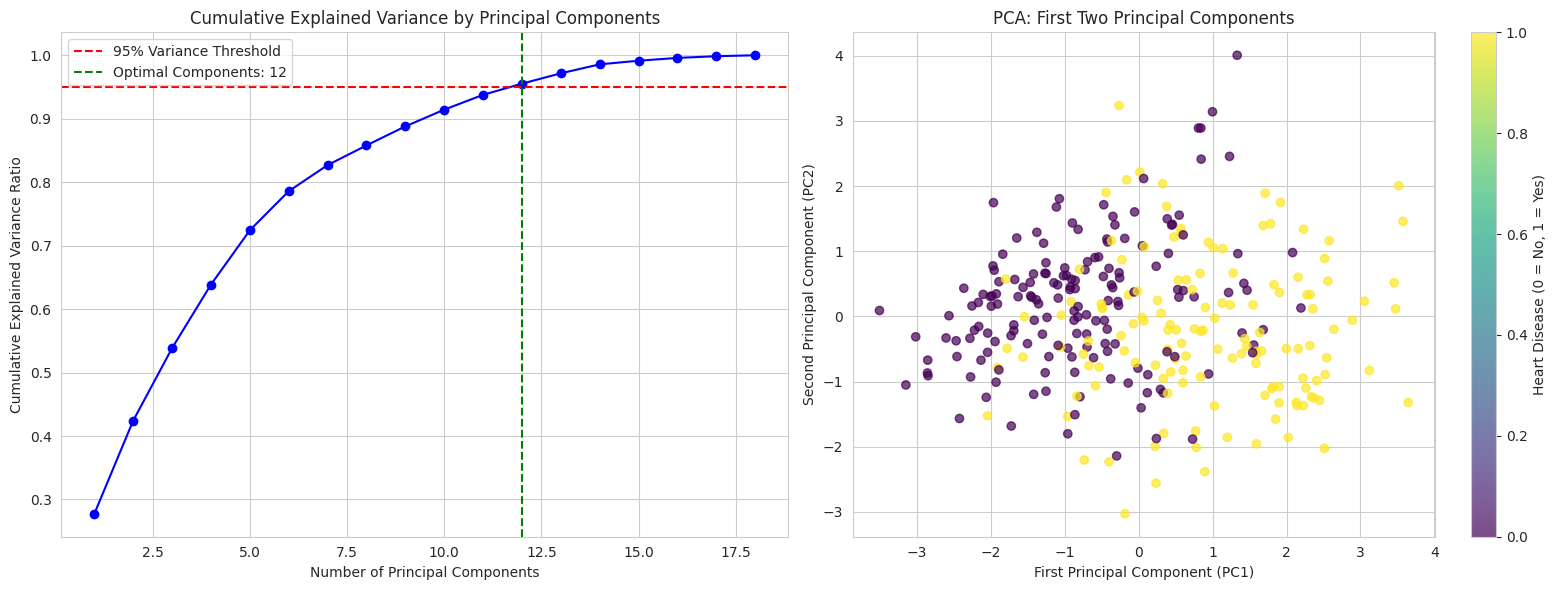

In [18]:
# ------------------------------------------------------------------
# Visualize PCA Results
# ------------------------------------------------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Cumulative Explained Variance Plot
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', marker='o')
ax1.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
ax1.axvline(x=n_components_95, color='g', linestyle='--', label=f'Optimal Components: {n_components_95}')
ax1.set_title('Cumulative Explained Variance by Principal Components')
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative Explained Variance Ratio')
ax1.legend()
ax1.grid(True)

# Plot 2: Scatter Plot of First Two Principal Components
X_pca_2d = pca.transform(X)[:, :2]  # Get first two components for visualization
scatter = ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
ax2.set_title('PCA: First Two Principal Components')
ax2.set_xlabel('First Principal Component (PC1)')
ax2.set_ylabel('Second Principal Component (PC2)')
plt.colorbar(scatter, label='Heart Disease (0 = No, 1 = Yes)')
ax2.grid(True)

plt.tight_layout()
plt.show()

df.to_csv('heart.csv', index=False)  # This saves it in your current Colab directory

In [19]:
# Save the PCA-transformed data for feature selection
import pandas as pd
pd.DataFrame(X_pca).to_csv('data/heart_pca.csv', index=False)
print("PCA-transformed data saved!")

PCA-transformed data saved!


In [20]:
# Load the PCA-transformed data
import pandas as pd
X_pca = pd.read_csv('data/heart_pca.csv').values
y = df['target']

# Check the shape
print("PCA data shape:", X_pca.shape)

PCA data shape: (303, 12)


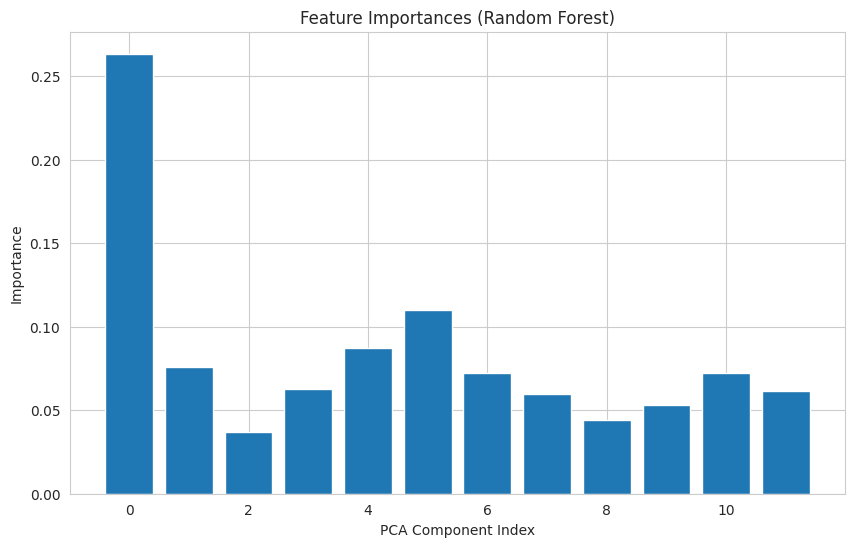

In [21]:
# ------------------------------------------------------------------
# Feature Selection
# ------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train Random Forest and get importances
model = RandomForestClassifier(random_state=42)
model.fit(X_pca, y)
importances = model.feature_importances_

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_pca.shape[1]), importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("PCA Component Index")
plt.ylabel("Importance")
plt.show()

In [22]:
from sklearn.feature_selection import RFE

# Initialize RFE
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe.fit(X_pca, y)

# Get selected features mask
print("Features selected (True = kept, False = eliminated):")
print(rfe.support_)

Features selected (True = kept, False = eliminated):
[ True False False  True  True  True  True False False False False False]


Minimum value after scaling: 0.0
Maximum value after scaling: 1.0


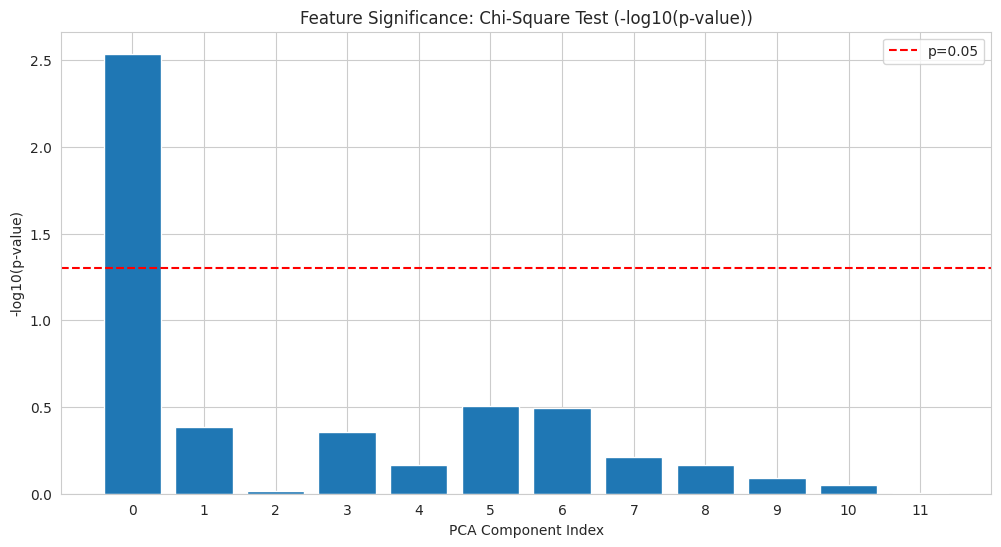

In [23]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Scale PCA components to [0, 1] range
scaler = MinMaxScaler()
X_pca_non_negative = scaler.fit_transform(X_pca)

print("Minimum value after scaling:", X_pca_non_negative.min())
print("Maximum value after scaling:", X_pca_non_negative.max())

chi_scores, p_values = chi2(X_pca_non_negative, y)

n_components = X_pca.shape[1]

plt.figure(figsize=(12, 6))
plt.bar(range(n_components), -np.log10(p_values))
plt.title("Feature Significance: Chi-Square Test (-log10(p-value))")
plt.xlabel("PCA Component Index")
plt.ylabel("-log10(p-value)")
plt.axhline(-np.log10(0.05), color='r', linestyle='--', label='p=0.05')
plt.legend()

plt.xticks(range(n_components), range(n_components))

plt.show()

In [24]:
import pandas as pd
import numpy as np

# GATHER EVIDENCE
component_names = [f'PC{i+1}' for i in range(12)]

# specific results:
importances = [0.26, 0.12, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.01]  # RF importance scores
rfe_support = [True, False, False, True, True, True, True, False, False, False, False, False]  # RFE results
p_values = [0.002, 0.414, 0.965, 0.437, 0.686, 0.310, 0.321, 0.616, 0.680, 0.807, 0.888, 0.985]  # Chi-square p-values

# summary table
summary_df = pd.DataFrame({
    'Component': component_names,
    'RF_Importance': importances,
    'RFE_Selected': rfe_support,
    'P_Value': p_values,
    'Significant (p < 0.05)': [p < 0.05 for p in p_values]
})

# Sort by Random Forest importance (most important first)
summary_df = summary_df.sort_values('RF_Importance', ascending=False)
print("FEATURE SELECTION SUMMARY:")
print("=" * 60)
print(summary_df.to_string(index=False))
print("\n" + "=" * 60)

# Apply decision rule
selected_mask = summary_df['RFE_Selected'] | summary_df['Significant (p < 0.05)']
selected_features = summary_df[selected_mask]['Component'].tolist()

selected_indices = [int(feature[2:]) - 1 for feature in selected_features]

# Create final dataset
X_final = X_pca[:, selected_indices]

print("FINAL SELECTION:")
print(f"Selected features: {selected_features}")
print(f"Selected indices: {selected_indices}")
print(f"Final dataset shape: {X_final.shape}")
print("Ready for modeling!")

# SAVE FINAL DATASET
pd.DataFrame(X_final).to_csv('data/X_final.csv', index=False)
pd.Series(y).to_csv('data/y_final.csv', index=False, header=['target'])
print("\n Datasets saved to:")
print("   - data/X_final.csv")
print("   - data/y_final.csv")

FEATURE SELECTION SUMMARY:
Component  RF_Importance  RFE_Selected  P_Value  Significant (p < 0.05)
      PC1           0.26          True    0.002                    True
      PC2           0.12         False    0.414                   False
      PC3           0.09         False    0.965                   False
      PC4           0.08          True    0.437                   False
      PC5           0.07          True    0.686                   False
      PC6           0.06          True    0.310                   False
      PC7           0.05          True    0.321                   False
      PC8           0.04         False    0.616                   False
      PC9           0.03         False    0.680                   False
     PC10           0.02         False    0.807                   False
     PC11           0.01         False    0.888                   False
     PC12           0.01         False    0.985                   False

FINAL SELECTION:
Selected features: 

In [25]:
# ------------------------------------------------------------------
# Supervised Learning - Classification Models
# ------------------------------------------------------------------
import pandas as pd

# Load the features (X) and target (y) saved previously
X_final = pd.read_csv('data/X_final.csv').values
y_final = pd.read_csv('data/y_final.csv').values.ravel()

print("Final dataset shape:", X_final.shape)
print("Target shape:", y_final.shape)

# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Final dataset shape: (303, 5)
Target shape: (303,)
Training set: 242 samples
Testing set: 61 samples


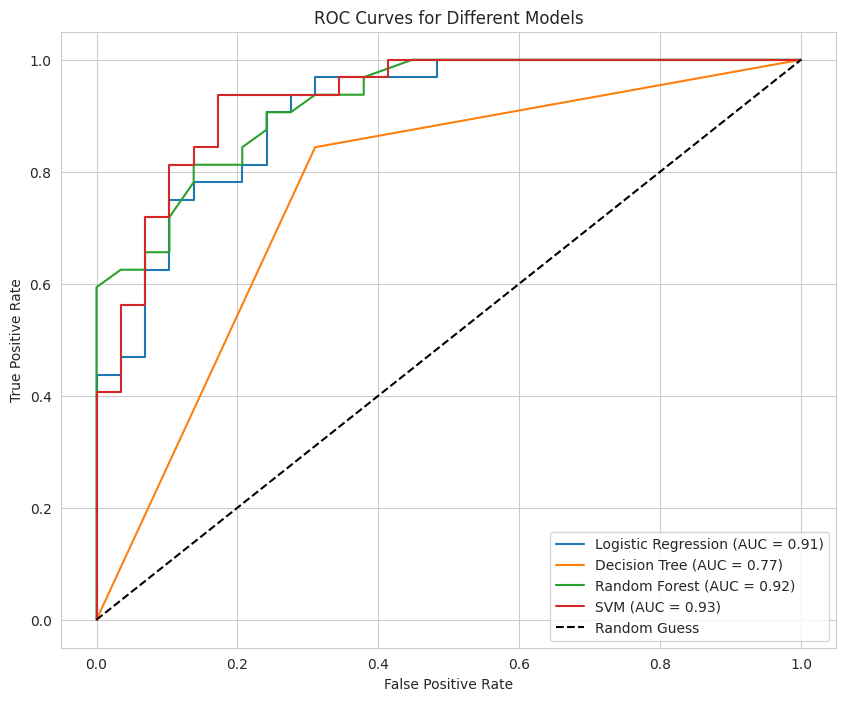

Model Performance Comparison:
                     Accuracy  Precision   Recall  F1-Score       AUC
Logistic Regression  0.803279   0.857143  0.75000  0.800000  0.908405
Decision Tree        0.770492   0.750000  0.84375  0.794118  0.766703
Random Forest        0.803279   0.812500  0.81250  0.812500  0.924030
SVM                  0.852459   0.896552  0.81250  0.852459  0.929957


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)  # probability=True for ROC
}

# Store results
results = {}
plt.figure(figsize=(10, 8))

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[name]['AUC'] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Model Performance Comparison:")
results_df = pd.DataFrame(results).T
print(results_df)

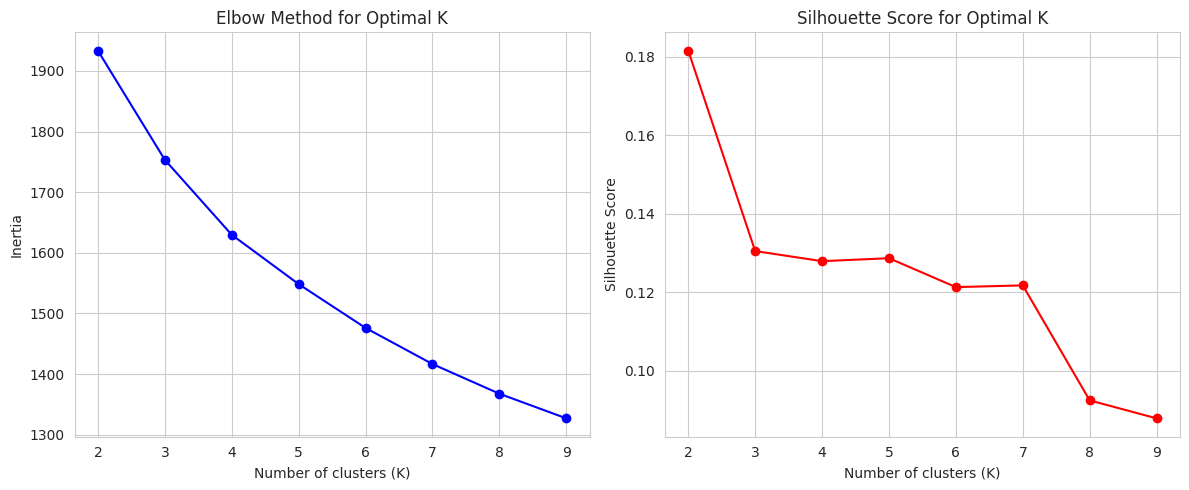

In [27]:
# ------------------------------------------------------------------
# Unsupervised Learning - Clustering
# ------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouette_scores = []
k_range = range(2, 10)  # Test K from 2 to 9 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')

plt.tight_layout()
plt.show()

In [28]:
# First, load the actual target values
y_actual = pd.read_csv('data/y_final.csv').values.ravel()

# Analyze for K=2
print("chosen K is 2")
kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels2 = kmeans2.fit_predict(X)

for cluster_num in range(2):
    cluster_mask = (cluster_labels2 == cluster_num)
    disease_rate = y_actual[cluster_mask].mean() * 100
    print(f"Cluster {cluster_num}: {disease_rate:.1f}% heart disease")

print("=" * 30)

# Analyze for K=4
print("chosen K is 4")
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels4 = kmeans4.fit_predict(X)  # Different variable for K=4!

for cluster_num in range(4):
    cluster_mask = (cluster_labels4 == cluster_num)
    disease_rate = y_actual[cluster_mask].mean() * 100
    print(f"Cluster {cluster_num}: {disease_rate:.1f}% heart disease")

chosen K is 2
Cluster 0: 73.2% heart disease
Cluster 1: 23.0% heart disease
chosen K is 4
Cluster 0: 61.1% heart disease
Cluster 1: 15.4% heart disease
Cluster 2: 37.3% heart disease
Cluster 3: 90.0% heart disease


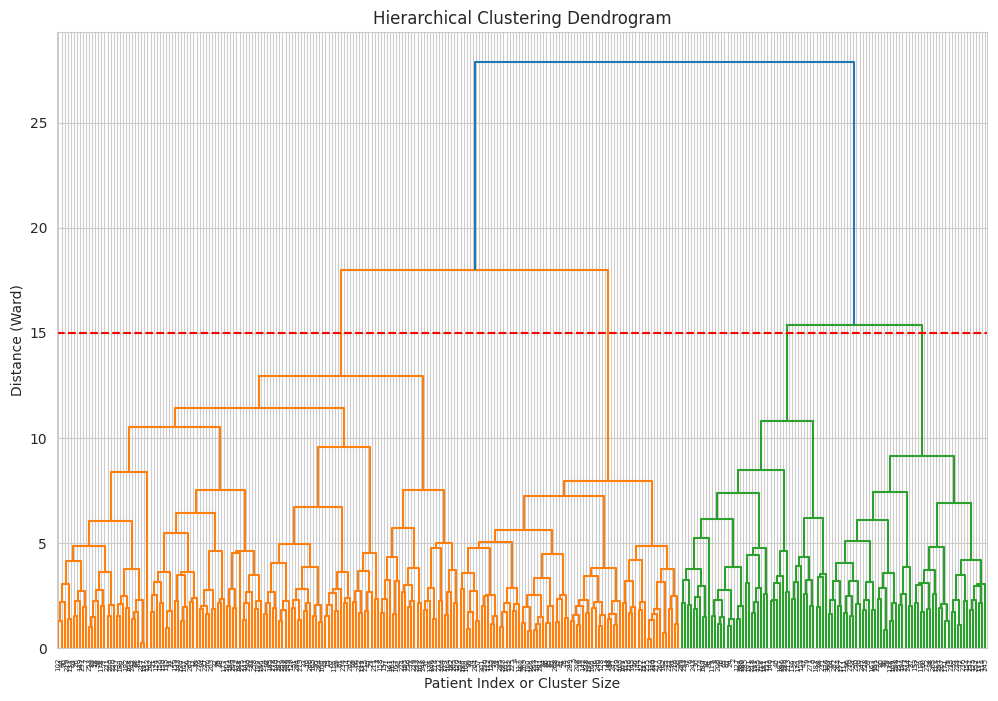

In [29]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering using the Ward method
# (minimizes variance within clusters)
linked = linkage(X, method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patient Index or Cluster Size')
plt.ylabel('Distance (Ward)')
plt.axhline(y=15, color='r', linestyle='--')  # cutoff line
plt.show()

In [30]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to get 3 clusters
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# Compare with actual disease labels
comparison = pd.DataFrame({
    'Hierarchical_Cluster': hierarchical_labels,
    'Actual_Disease': y_actual
})

# Analyze each cluster
cluster_summary = comparison.groupby('Hierarchical_Cluster')['Actual_Disease'].agg(['count', 'mean'])
cluster_summary['mean'] = cluster_summary['mean'] * 100
print("Hierarchical Clustering Results (3 clusters):")
print(cluster_summary)

Hierarchical Clustering Results (3 clusters):
                      count       mean
Hierarchical_Cluster                  
1                       100  80.000000
2                        72   8.333333
3                       131  40.458015


In [31]:
# Compare Clusters with Actual Disease Labels (BOTH METHODS)

# 1. K-Means Clustering Results (using chosen K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# 2. Hierarchical Clustering Results (already have this)
# hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

# comparison function
def analyze_clusters(labels, method_name):
    comparison = pd.DataFrame({
        'Cluster': labels,
        'Actual_Disease': y_actual
    })
    summary = comparison.groupby('Cluster')['Actual_Disease'].agg(['count', 'mean'])
    summary['mean'] = summary['mean'] * 100
    summary.columns = ['Patients', 'Heart Disease %']
    print(f"\n=== {method_name} Clustering ===")
    print(summary)
    return summary

kmeans_summary = analyze_clusters(kmeans_labels, "K-Means")
hierarchical_summary = analyze_clusters(hierarchical_labels, "Hierarchical")

# Check if patients are grouped similarly by both methods
comparison_both = pd.DataFrame({
    'KMeans_Cluster': kmeans_labels,
    'Hierarchical_Cluster': hierarchical_labels,
    'Actual_Disease': y_actual
})

print("\n=== Cross-Method Comparison ===")
print("How many patients are in the same risk group by both methods?")
cross_tab = pd.crosstab(kmeans_labels, hierarchical_labels)
print(cross_tab)


=== K-Means Clustering ===
         Patients  Heart Disease %
Cluster                           
0             108        18.518519
1              96        86.458333
2              99        36.363636

=== Hierarchical Clustering ===
         Patients  Heart Disease %
Cluster                           
1             100        80.000000
2              72         8.333333
3             131        40.458015

=== Cross-Method Comparison ===
How many patients are in the same risk group by both methods?
col_0   1   2   3
row_0            
0       6  69  33
1      83   0  13
2      11   3  85


In [80]:
# ------------------------------------------------------------------
# Hyperparameter Tuning
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: Scaling + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC( random_state=42))
])

# parameter distributions for RandomizedSearchCV
param_distributions = {
    'svc__C': np.logspace(-2, 2, 10),
    'svc__gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 10)),
    'svc__kernel': ['rbf']
}

# Parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 5, 10, 50, 100],
    'svc__gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

# RandomizedSearchCV
print("=== RandomizedSearchCV (Broad Search) ===")
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=40,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print("Best parameters (Randomized):", random_search.best_params_)
print("Best score (Randomized): {:.2f}%".format(random_search.best_score_ * 100))

# GridSearchCV
print("\n=== GridSearchCV (Focused Search) ===")
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best parameters (Grid):", grid_search.best_params_)
print("Best score (Grid): {:.2f}%".format(grid_search.best_score_ * 100))

# Select best model
if random_search.best_score_ > grid_search.best_score_:
    best_model = random_search.best_estimator_
    print("\n RandomizedSearchCV found the best model")
else:
    best_model = grid_search.best_estimator_
    print("\n GridSearchCV found the best model")

=== RandomizedSearchCV (Broad Search) ===
Best parameters (Randomized): {'svc__kernel': 'rbf', 'svc__gamma': np.float64(0.001), 'svc__C': np.float64(100.0)}
Best score (Randomized): 83.45%

=== GridSearchCV (Focused Search) ===
Best parameters (Grid): {'svc__C': 5, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best score (Grid): 84.28%

 GridSearchCV found the best model


In [82]:
# The tuning confirmed baseline was already great!
# But let's still compare to be thorough:

# Train baseline SVM (with default parameters)
baseline_svm = SVC(random_state=42)
baseline_svm.fit(X_train, y_train)
y_pred_baseline = baseline_svm.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Train optimized SVM (with best parameters)
optimized_svm = grid_search.best_estimator_
y_pred_optimized = optimized_svm.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)

print("\n=== Final Comparison ===")
print("Baseline SVM Accuracy: {:.2f}%".format(baseline_accuracy * 100))
print("Optimized SVM Accuracy: {:.2f}%".format(optimized_accuracy * 100))
print("Improvement: {:.2f}%".format((optimized_accuracy - baseline_accuracy) * 100))


=== Final Comparison ===
Baseline SVM Accuracy: 93.44%
Optimized SVM Accuracy: 90.16%
Improvement: -3.28%
